# **Ejercicio**

El siguiente conjunto de datos contiene los salarios de unos clientes de un banco y las veces que usó una tarjeta de crédito. Use el modelo de `K-means` para encontrar grupos

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000,
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    8000, 12000, 6000, 14500, 12600, 7000],

                         "transacciones": [25, 20, 16, 23, 25, 18,
                                           23, 22, 24, 21, 27, 18,
                                           8, 3, 6, 4, 9, 3]})

escalador = MinMaxScaler().fit(clientes.values)

# Creemos el dataframe pero con las columnas transformadas
clientes = pd.DataFrame(escalador.transform(clientes.values),
                       columns=["saldo", "transacciones"])

# Ajustamos el modelo a nuestros datos
kmeans = KMeans(n_clusters=3).fit(clientes.values)

# Le pasamos a nuestro dataframe los clusters creados por el modelo
clientes["cluster"] = kmeans.labels_

clientes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,saldo,transacciones,cluster
0,0.956522,0.916667,0
1,0.847826,0.708333,0
2,0.913043,0.541667,0
3,0.815217,0.833333,0
4,0.891304,0.916667,0
5,1.000000,0.625000,0
6,0.304348,0.833333,2
7,0.434783,0.791667,2
8,0.413043,0.875000,2
9,0.369565,0.750000,2


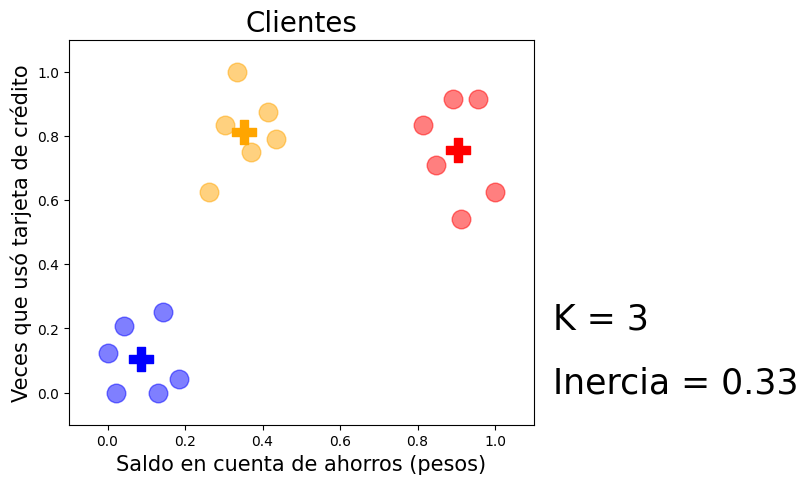

In [6]:
# Instrucciones para graficar los clusters

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)

    # Posicion de los centroides
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])

plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
# La inercia es una métrica del desempeño de los clusters
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

del clientes["cluster"]

# **Método del Codo**

El método del codo es un método cualitativo que nos permite identificar cuál es la cantidad óptima de clusters, en algunos casos estos clusters ya estan dados por el negocio, en caso de que no usamos el método del codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

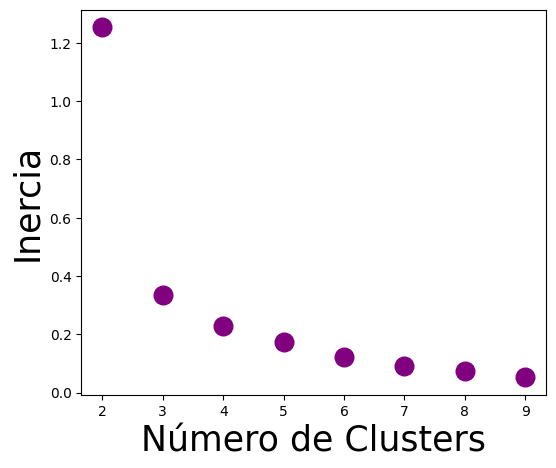

In [7]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(clientes.values)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()